# Google app store EDA
This is a project to analyze the google app store data. The data is from Kaggle.\
*Context*\
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

*Content*\
Each app (row) has values for catergory, rating, size, and more.

*Acknowledgements*\
This information is scraped from the Google Play Store. This app information would not be available without it.

*Inspiration*\
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

1. IMPORT LIBRARIES

In [93]:

import pandas as pd
# import ydata_profiling as yd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

2. DATA LOADING , EXPLORATION AND CLEANING

In [94]:
# import data 
df= pd.read_csv("./data/googleplaystore.csv")

In [95]:
# # generate report
# prof= yd.ProfileReport(df)
# prof.to_file(output_file="./outputs/ydata_playstore.html")

. let's look on top five rows of the data


In [96]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### .important things to know

In [97]:
# set options to be maximum for rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# hide all warnings
import warnings
warnings.filterwarnings("ignore")

In [98]:
# df.columns
print(f"The names of columns in this dataset are follow as: {df.columns}")

The names of columns in this dataset are follow as: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [99]:
print(f"The number of rows are {df.shape[0]}, and columns are {df.shape[1]}")

The number of rows are 10841, and columns are 13


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.191513,5.157352e-01,1.0,4.0,4.3,4.5,5.0
Reviews,10841.0,444111.928051,2.927629e+06,0.0,38.0,2094.0,54768.0,78158306.0


In [102]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### . how to make column "Size" which is object datatype convert into numeric datatype


In [103]:
df["Size"].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
3.4M                    65
2.8M                    65
32M                     63
3.7M                    63
34M                     63
3.9M                    62
3.0M                   

In [104]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [105]:
df["Size"].isnull().sum()

np.int64(0)

##### . no missing values in size, we are good to go
 Observations:\
 1 .Varies with device\
 2 .M\
 3 .k\

## verify the number of values and 3 different kinds of values

In [106]:
# find the values having M in them
df["Size"].loc[df["Size"].str.contains("M")].value_counts().sum()

np.int64(8830)

In [107]:
# find the values having k in them
df["Size"].loc[df["Size"].str.contains("k")].value_counts().sum()

np.int64(316)

In [108]:
# find the values having Varies with device in them
df["Size"].loc[df["Size"].str.contains("Varies with device")].value_counts().sum()

np.int64(1695)

In [109]:
8830+316+1695

10841

In [110]:
len(df)

10841

In [111]:
df["Size"]

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
32                      11M
33                      11M
34                     4.2M
35                  

In [112]:
# convert the whole size column into bytes
# let's define a function

def convert_size(size):
    if isinstance(size, str):
        if "k" in size:
            return float(size.replace("k","")) * 1024
        elif "M" in size:
            return float(size.replace("M","")) * 1024 * 1024
        elif "Varies with device" in size:
            return np.nan
        return size

In [113]:
# let's apply this function
df["Size"]= df["Size"].apply(convert_size)

In [114]:

df["Size"]

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [115]:
# rename the column of Size
df.rename(columns={"Size" : "Size_in_bytes"}, inplace=True)

In [116]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [117]:
df["Size_in_Mb"]= df["Size_in_bytes"].apply(lambda x: x/(1024*1024))

In [118]:
# df["Size_in_kb"]= df["Size_in_bytes"].apply(lambda x: x/(1024))

In [119]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


## Let's take care of install columns

In [120]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [121]:
df["Installs"].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [122]:
df["Installs"].isnull().sum()

np.int64(0)

### About column(Install)
1.  remove plus(+) sign
2.  remove comma(,)
3.  convert the column into an integer

In [123]:
df["Installs"]= df["Installs"].apply(lambda x: x.replace("+","") if "+" in str(x) else x)

In [124]:
df["Installs"]=df["Installs"].apply(lambda x: x.replace(",","") if "," in str(x) else x)

In [125]:
df["Installs"].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [126]:
df["Installs"]= df["Installs"].apply(lambda x: int(x))

In [127]:
# making a new column called "Installs_category" which will have the category of the installs
bins= (-1,0,10,1000,10000,100000, 1000000, 10000000, 10000000000)
labels= ("no","very low","low","moderate","more than moderate","high","very high","top notch")
df["Installs_category"]=pd.cut(df["Installs"], bins=bins, labels=labels)

In [128]:
df["Installs_category"].value_counts()# check the value count of the new column

Installs_category
low                   2162
high                  2118
very high             2004
more than moderate    1648
moderate              1531
top notch              828
very low               535
no                      15
Name: count, dtype: int64

In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.191513e+00,5.157352e-01,1.000000,4.0,4.3,4.5,5.000000e+00
Reviews,10841.0,4.441119e+05,2.927629e+06,0.000000,38.0,2094.0,54768.0,7.815831e+07
Size_in_bytes,9146.0,2.255921e+07,2.368595e+07,8704.000000,5138022.4,13631488.0,31457280.0,1.048576e+08
Installs,10841.0,1.546291e+07,8.502557e+07,0.000000,1000.0,100000.0,5000000.0,1.000000e+09
Size_in_Mb,9146.0,2.151414e+01,2.258868e+01,0.008301,4.9,13.0,30.0,1.000000e+02


## Lets take care of Price column

In [130]:
df["Price"].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

In [131]:
# let's see how many values have $ sign
df["Price"].loc[df["Price"].str.contains("\$")].value_counts().sum()

np.int64(800)

In [132]:
# this code counts the number of values in the "price" column which contain 0 but does not contain $ sign
df["Price"].loc[(df["Price"].str.contains("0")) & (~df["Price"].str.contains("\$"))].value_counts().sum()

np.int64(10041)

In [133]:
df["Price"]=df["Price"].apply(lambda x: x.replace("$", "") if "$" in str(x) else x)

In [134]:
df["Price"].value_counts()

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
3.49          7
7.99          7
24.99         7
5.49          6
19.99         6
6.49          5
8.99          5
12.99         5
11.99         5
10.00         3
1.00          3
16.99         3
2.00          3
17.99         2
10.99         2
9.00          2
79.99         2
7.49          2
3.95          2
33.99         2
1.70          2
13.99         2
8.49          2
39.99         2
1.50          1
25.99         1
74.99         1
15.99         1
3.88          1
1.76          1
3.02          1
400.00        1
4.84          1
2.50          1
1.59          1
1.61          1
4.77          1
5.00          1
1.29          1
379.99        1
299.99        1
37.99         1
18.99         1
389.99        1
19.90         1
1.75          1
14.00         1
4.

In [135]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


In [136]:
df["Price"]=df["Price"].apply(lambda x: float(x))

In [137]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [138]:
# using f string print min, max and mean price of the app
print(f"Min price is {df["Price"].min()}")
print(f"Min price is {df["Price"].max()}")
print(f"Min price is {df["Price"].mean()}")

Min price is 0.0
Min price is 400.0
Min price is 1.0272733142699015


# 2.1 Descriptive statistics

In [139]:
df.describe()


,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


# OBSERVATIONS
___
. Now, we have only 6 columns as numeric data type.\
. we can observe their descriptive statistics and make tons of observations as per our hypothesis.\
. we can see that the Rating column has a minimum value of 1 and a maximum value is 5 , which is the range of Rating and the mean is 4.19 which is good  rating. On an average people give this rating.\
. we can see that Reviews columns has a minimum value of 0 and a max value of 7.81583e+07 , which is the range of the reviews and the mean is 4.44 which is good number of reviews . on the average people give the reviews to the app. but it does not make sense to us , as we have different categories of apps.\
. Similarly we can observe the other columns as well.\

Therefore, that most important thing is to classify as app based on the correlation matrix and then observe the relation between the app , category and number of installs , reviews, ratings, etc

# But even before that we have to think about the missing values in the data set.

# **2.2 Dealing with the missing values**
Dealing with the missing values is one of the most important part of the data wrangling process, we can must deal with missing values in order to get the correct insights from the data.

# . let's have a look on the missing values in the dataset


In [140]:
df.isnull().sum() # this will show the number of null values in each column

App                     0
Category                1
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             3
Size_in_Mb           1695
Installs_category       0
dtype: int64

In [141]:
df.isnull().sum().sort_values(ascending=False) # this will show the null values ascending order through the column wise

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             3
Type                    1
Category                1
Genres                  1
Installs                0
App                     0
Reviews                 0
Last Updated            0
Content Rating          0
Price                   0
Installs_category       0
dtype: int64

In [142]:
df.isnull().sum().sum()

np.int64(4878)

In [143]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False) # this code will show the percentage of missing values in top to bottom

Size_in_bytes        15.635089
Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.027673
Type                  0.009224
Category              0.009224
Genres                0.009224
Installs              0.000000
App                   0.000000
Reviews               0.000000
Last Updated          0.000000
Content Rating        0.000000
Price                 0.000000
Installs_category     0.000000
dtype: float64

#### .let's plot the missing values in the dataset

<Axes: >

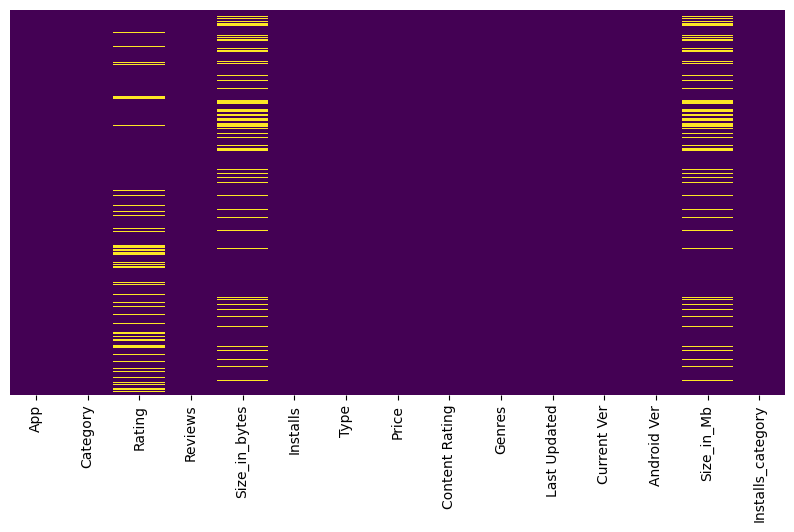

In [144]:
# make a figure size
plt.figure(figsize=(10,5))
# plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

##### . There is an other way , let's plot the missing values by percentage

Text(0.5, 1.0, ' Percentage of missing values in each Column')

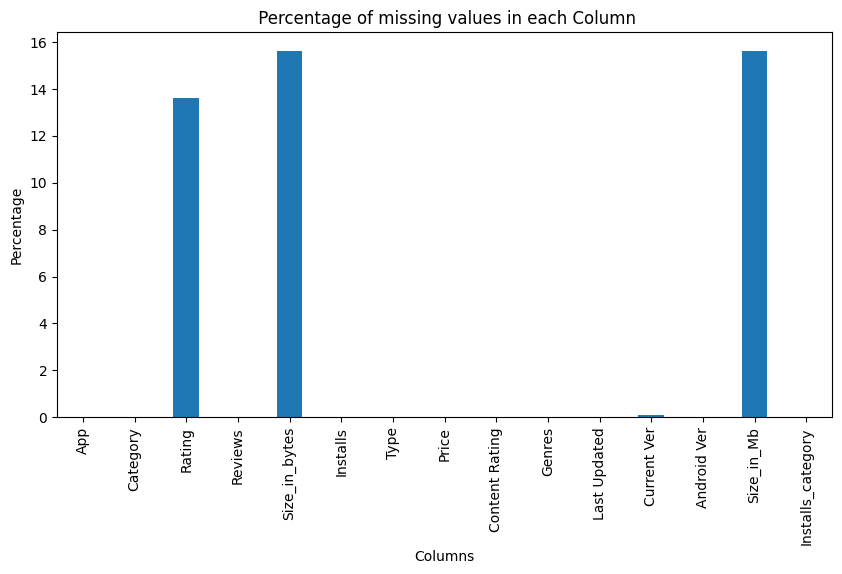

In [145]:
# make figure size 
plt.figure(figsize=(10,5))
# plot the null values by their percentage in each column
missing_percentage =df.isnull().sum()/len(df)*100
missing_percentage.plot(kind="bar")
# add the labels
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.title(" Percentage of missing values in each Column")

> . Let's plot the missing values other than "Rating", "Size_in_bytes", "Size_in_Mb".\
>  . We have missing percentage columns than having less than one percentage of missing values , we will plot them as follow:

Text(0.5, 1.0, ' Percentage of missing values of less than 1')

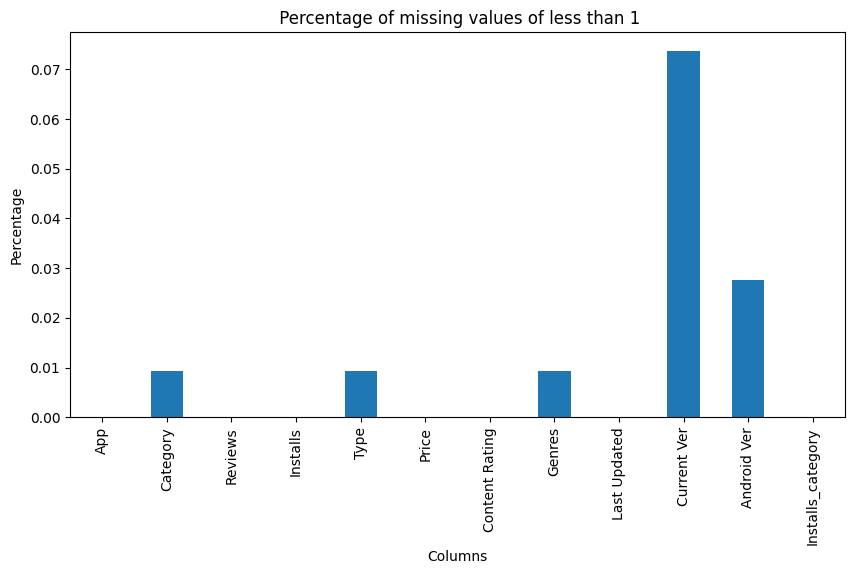

In [146]:
plt.figure(figsize=(10,5)) # make figure size
missing_percentage[missing_percentage<1].plot(kind="bar") #plot the null value less than 1
# add the labels
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.title(" Percentage of missing values of less than 1")

In [147]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Size_in_bytes        15.635089
Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.027673
Type                  0.009224
Category              0.009224
Genres                0.009224
Installs              0.000000
App                   0.000000
Reviews               0.000000
Last Updated          0.000000
Content Rating        0.000000
Price                 0.000000
Installs_category     0.000000
dtype: float64


# *Observations*
_______________
>. we have 1695 missing values in the "Size_in_bytes" and "Size_in_Mb" columns , which is both columns have 15.6%  of the null values.\
. we have 1474 missing values in the "Rating" column , which have 13.6%  of the toatl null values in this column.\
. we have 8 missing values in the "Current Ver" column , which have 0.073%  of the toatl null values in this column.\
. we have 2 missing values in the "Android Ver" column , which have 0.027%  of the toatl null values in this column.\
. we have 1 missing values in the "Category","Type", "Genres" columns , which have 0.009% of the toatl null values in this each columns.\

# 2.3. Dealing with the missing values

> we can not impute the Rating column as is in directly linked with the installation column. To test their hypothesis we need to plot the Rating column with the Installs and Size columns and Statistically test is using * Pearson Correlation test* .

### Let's run the correaltion

In [148]:
df.describe() # these are numeric columns

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

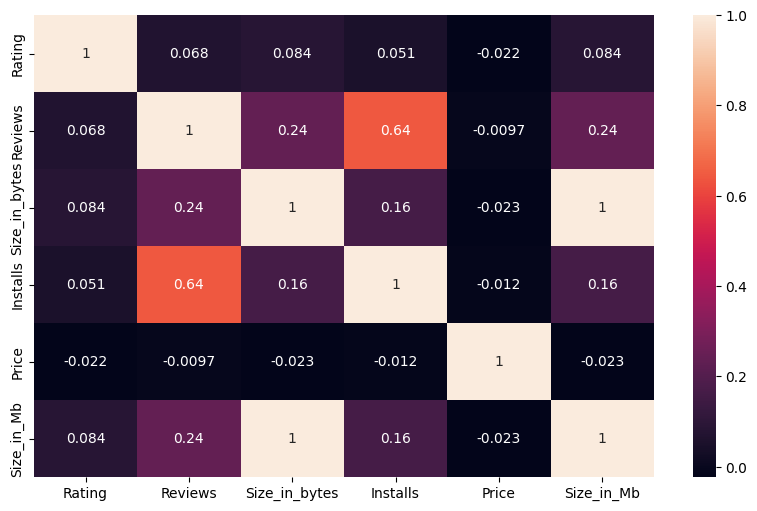

In [149]:
# make a correlation matrix of the numeric columns
plt.figure(figsize=(10,6))  # make the figure size
numeric_cols=["Rating","Reviews","Size_in_bytes","Installs","Price","Size_in_Mb"]
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot the correlation matrix

In [150]:
# make correlation matrix using pandas
df[numeric_cols].corr()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


In [151]:
# # install library scipy
# pip install scipy


In [152]:
# # We can calculate the pearson correlation coeficient using scipy as well as follow:

# # remove rows  containing NaN or infinite values (Important to calculate Pearson's R)
df_clean=df.dropna()

# # calculate Pearson's R between Rating and Installs
# from scipy install stats

# pearson_r= stat.pearsonr(df_clean["Reviews"],df_clean["Installs"])
# print(f"pearson's R between Reviews and Installs: {pearson_r:.4f}")

# Observations:
____
> Lighter color shows the positive correlation and darker shows the low correlation.\
> we can see that the reviews column has a moderate positive correlation with Installs column , whioch is o.64 acording to corr(). which is quite good.\
> This shows that the more the reviews the more the installs are for one app. if in any case we need to impute reviews we have to think of number of install.\
> If we have an app with 2 installs and we impute the reviews with 100 0 or via average reviews than it will be wrong.\
> Installs is slightly correlated size_in _Mb or size_in_bytes , which is 0.16, this also shows us the importance of size and installs. but we can depend on it as the Pearson Correlation is very low.\
_____

> Before going ahead , let's remove the rows with missing values in the Current Ver, Android Ver, Category , Type, genres columns. as they are very less in number and will not affect our analysis.\  

In [153]:
# lenght before removing null values
print(f"Lenght of the dataFrame before removing null Values:{len(df)}")

Lenght of the dataFrame before removing null Values:10841


In [154]:
# remove the rows having null values in the  Current Ver, Android Ver, Category, Type and Genres columns
df.dropna(subset=["Current Ver","Android Ver","Category","Type","Genres"], inplace=True)

In [155]:
# lenght after removing null values
print(f"Lenght of the dataset after removing null values: {len(df)}")

Lenght of the dataset after removing null values: 10829


>. we have removed 12 rows having null values from Current Ver, Android Ver, Category, Type and Genres columns.


In [156]:
# let's check  the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Mb           1694
Rating               1469
Category                0
Reviews                 0
Installs                0
App                     0
Type                    0
Price                   0
Genres                  0
Content Rating          0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

# Observations\\
___
> 1. Only rating and size_in_bytes and size_in_Mb columns are left with missing values.\
> 2. we know that we have to be carefull while dealing with Rating column, as it is directly linked with the Installs column.\
> 3. In size columns we already know about Varies with devices values which have converted into null values , we donot need to impute at the moment as every app has different size and nobody can predict that as nearly as possible.\
> ___


In [157]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [158]:
# use groupby function to find the trend of rating in each Installs_category
df.groupby('Installs_category')["Rating"].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
more than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
high,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
very high,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
top notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [159]:
df["Rating"].isnull().sum()

np.int64(1469)

In [160]:
# in which Installs_category the Rating has NaN values
df["Installs_category"].loc[df["Rating"].isnull()].value_counts()

Installs_category
low                   880
very low              453
moderate               88
more than moderate     31
no                     14
high                    3
very high               0
top notch               0
Name: count, dtype: int64

# . lets plot this and have a look


Text(7, 3.5, 'Null values: 0')

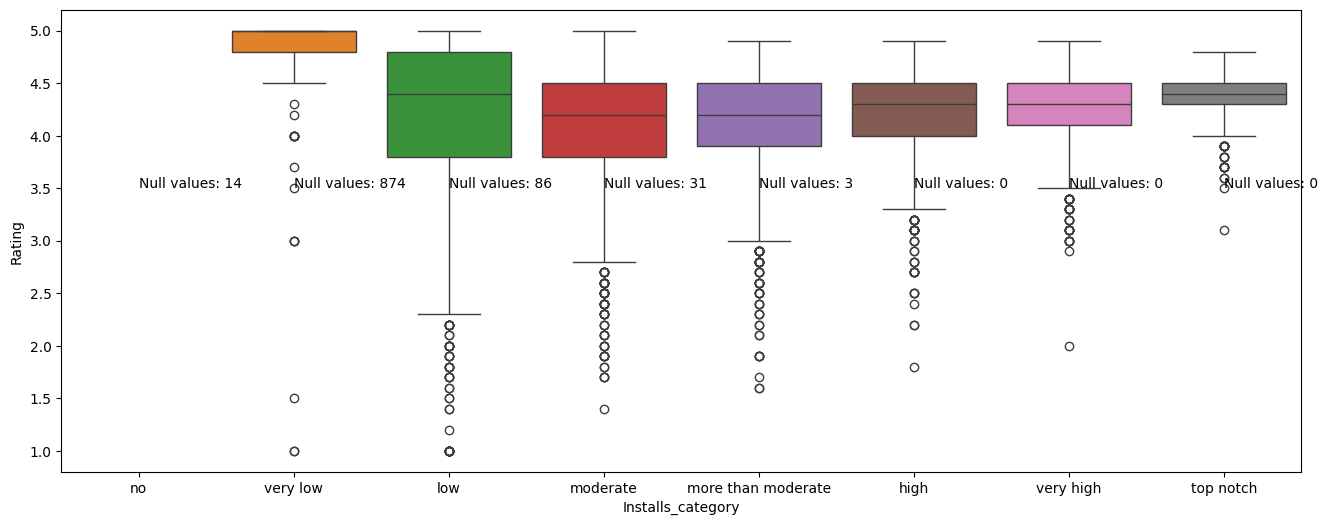

In [161]:
# plot the boxplot of rating in each Installs_category
plt.figure(figsize=(16,6))
sns.boxplot(x="Installs_category", y="Rating", hue="Installs_category",data=df) # plot the boxplot
# add the text the number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')



# ASSIGNMENT: please replace the repective missing values of rating , with respect to average give in each installs_category.

#### . let's check if there is any similar link with Reviews as well

In [162]:
# in which Install_category the Rating  has NaN values
df["Installs_category"].loc[df["Reviews"].isnull()].value_counts()

Installs_category
no                    0
very low              0
low                   0
moderate              0
more than moderate    0
high                  0
very high             0
top notch             0
Name: count, dtype: int64

> There are no Null values in Reviews

<Axes: xlabel='Installs_category', ylabel='Reviews'>

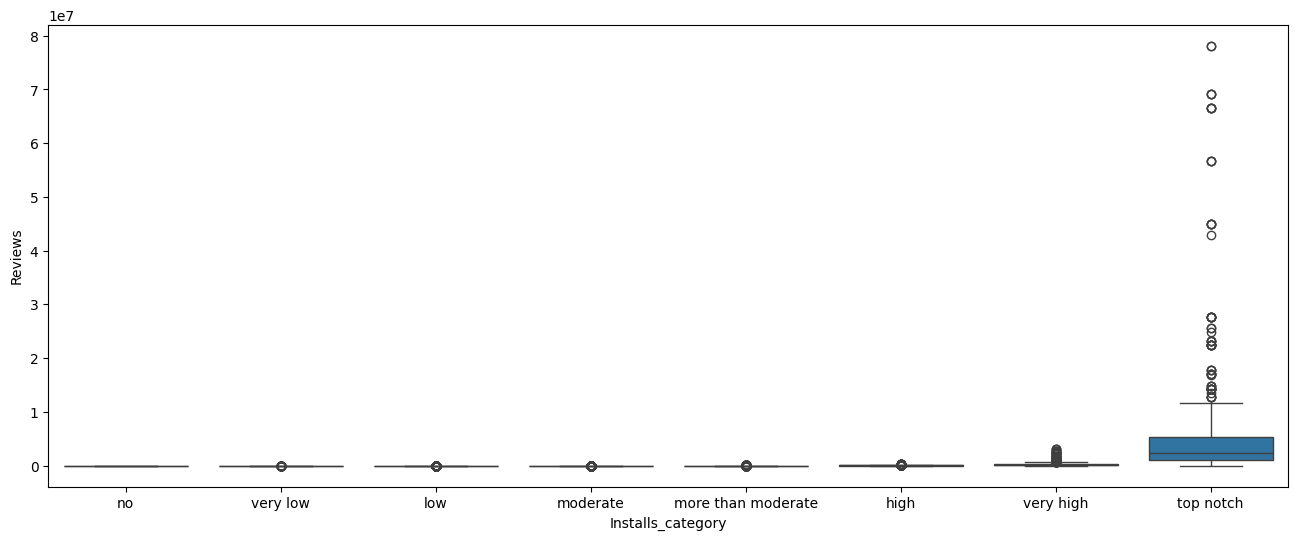

In [163]:
# lets plot the same plots for Reviews column as well
plt.figure(figsize=(16,6))
sns.boxplot(x="Installs_category", y="Reviews", data=df)

> . The data looks really unbalance, let's normalize the data using transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

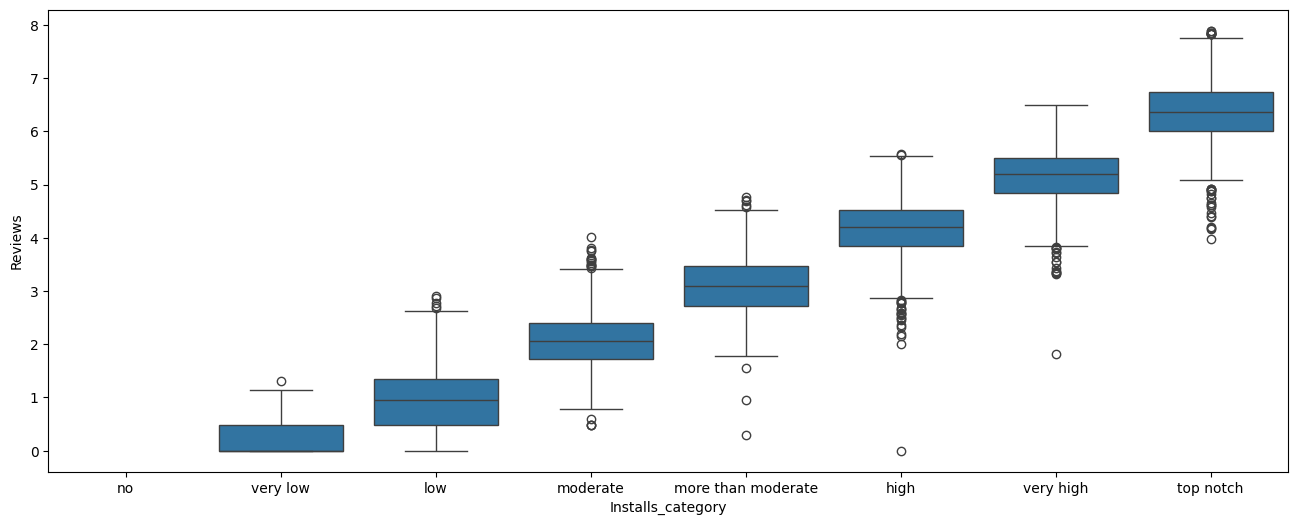

In [164]:
# let's plot the same plot for Reviews column as well
plt.figure(figsize=(16,6))
sns.boxplot(x="Installs_category", y=np.log10(df["Reviews"]), data=df)

> . we also draw a scatter plot of the rating and reviews columns with the Installs_category

<Axes: xlabel='Rating', ylabel='Reviews'>

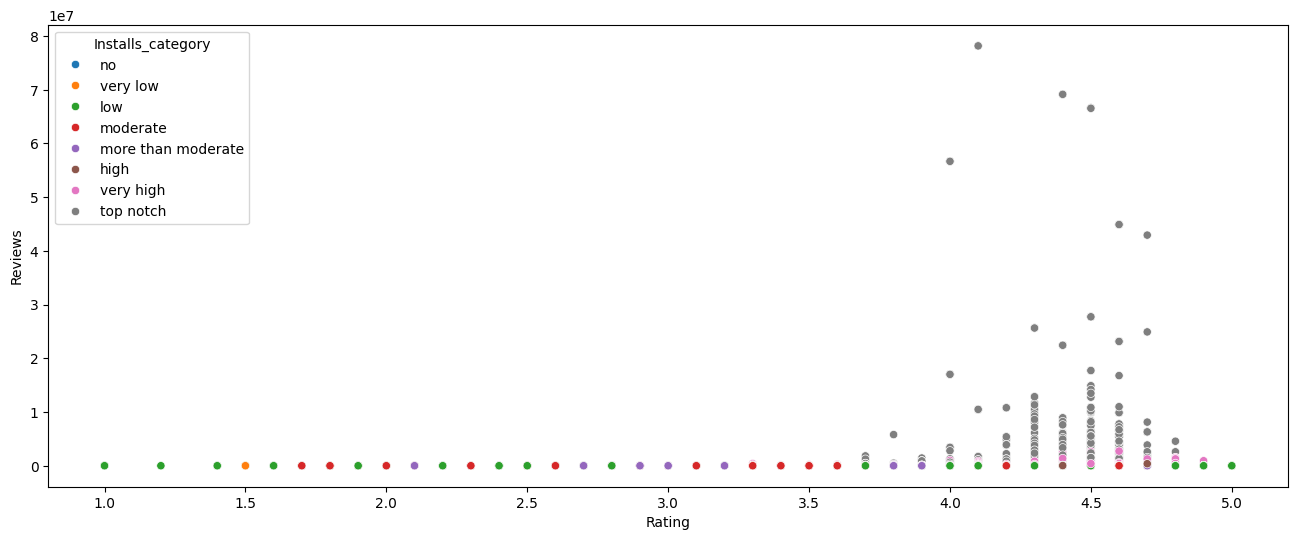

In [165]:
# Draw a scatter plot between Rating , Reviews and Installs_category
plt.figure(figsize=(16,6))
sns.scatterplot(x="Rating", y="Reviews", hue="Installs_category", data = df)

<Axes: xlabel='Rating', ylabel='Reviews'>

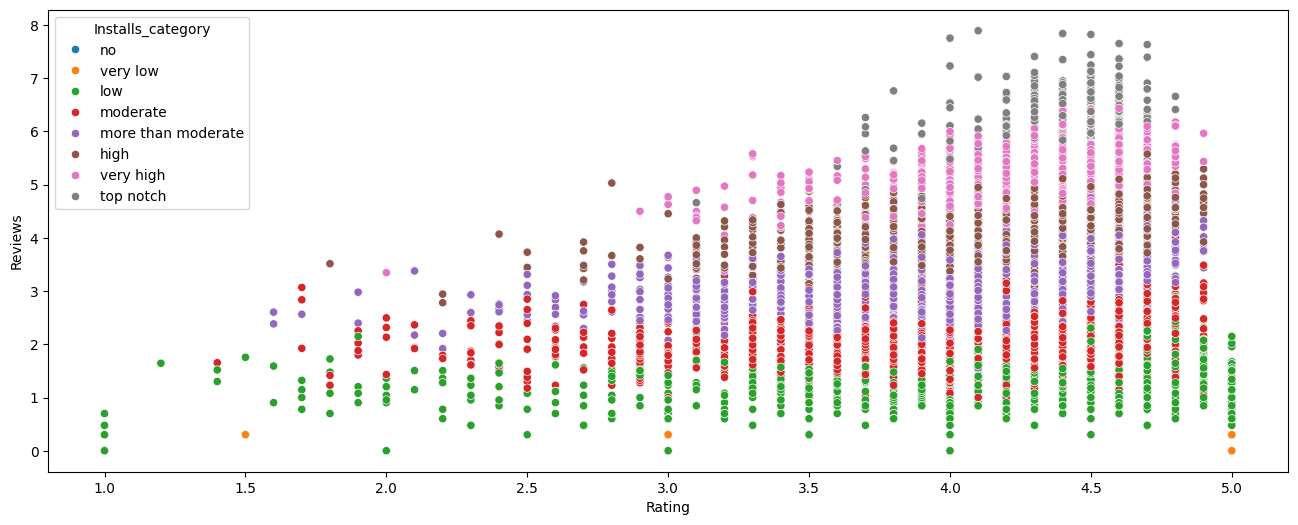

In [166]:
plt.figure(figsize=(16,6))
sns.scatterplot(x="Rating", y= np.log10(df["Reviews"]), hue="Installs_category", data = df)

> . It doesnot show any trend because you should know that Rating is a categorical variable (ordinal) and review is a continous variable, therefore we can not plot them together
____
>  lets try with Reviews and installs 

<Axes: xlabel='Reviews', ylabel='Installs'>

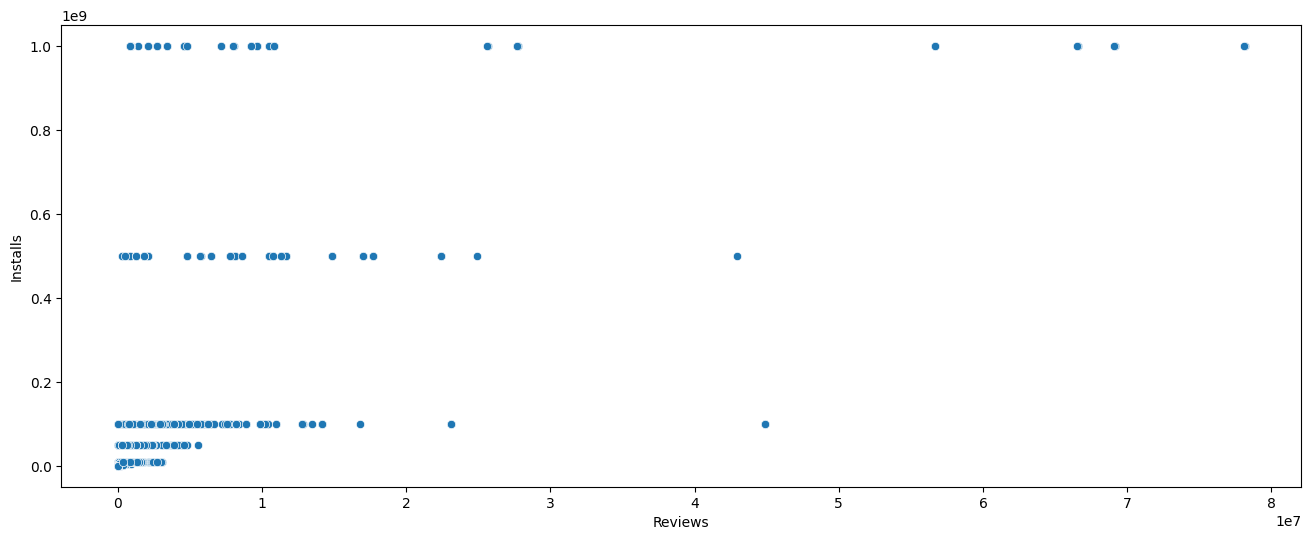

In [167]:
# plot reviews and installs in a scatterplot
plt.figure(figsize=(16,6))
sns.scatterplot(x="Reviews", y="Installs", data=df)

<Axes: xlabel='Reviews', ylabel='Installs'>

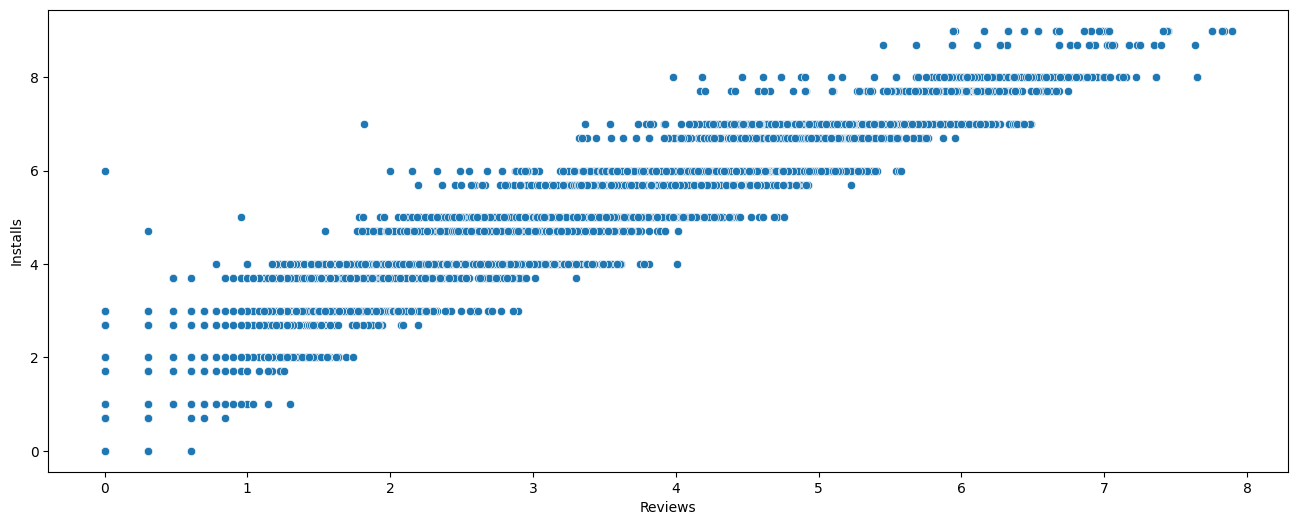

In [168]:
plt.figure(figsize=(16,6))
sns.scatterplot(x= np.log10(df["Reviews"]), y= np.log10(df["Installs"]), data=df)

> Now we see a slightly trend but still the issue is installs were given in a factorial manner as 10+, 20+, 1000+ etc. and these are not continous number but discrete one , therefore we can see a slight trend here . lets plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

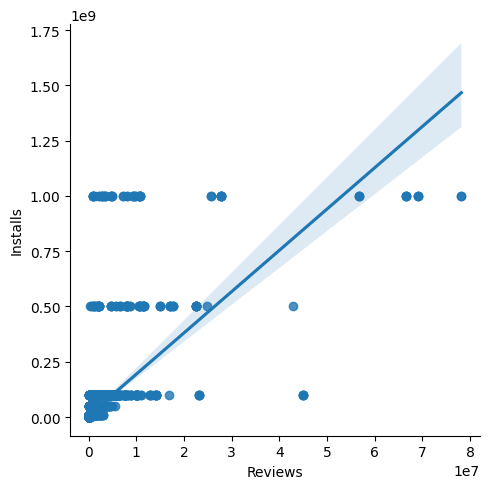

In [169]:
# plot reviews and installs in a scatterplot with the trend line
plt.figure(figsize=(16,6))
sns.lmplot(x="Reviews", y="Installs", data=df)  # plot the scatter plot with trend line

> We can see a nice trend which shows that number of Reviews increases with the number of Installs, which is quite obviouse
____
# Observation:
> We can see that most of the null values from Rating column are no-moderate installation apps, which make sense that if the app has less installations, it has less Rating and review

# 2.3. Duplicates\
>`Removing duplicates is one of the most important part of the data wrangling process , we must remove the duplicates in order to get the correct insights from the data.`\
`If you donot remove duplicates from the dataset, it can lead to incorrect insights and analysis.`\
`Duplicates can skew statistical measures such as mean , median and standarrd deviation and can also lead to over representation of certain data points.`\
`It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.`\

In [170]:
# find duplicates if any
df.duplicated().sum()

np.int64(483)

>`This show us total duplicates , but we can also check on the app name , as we know that every app has unique name.`

In [171]:
# find the duplicate if any in the "app" column
df["App"].duplicated().sum()

np.int64(1181)

`1. Oops! we have 1181 duplicates app names.`\
`2. Can we find column which can help us to remove the duplicates?`\

>Let's check for number of duplicates in each column using a for loop and printing the output.

In [172]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in{col} column are: {df[col].duplicated().sum()}")

Number of duplicates inApp column are: 1181
Number of duplicates inCategory column are: 10796
Number of duplicates inRating column are: 10789
Number of duplicates inReviews column are: 4830
Number of duplicates inSize_in_bytes column are: 10373
Number of duplicates inInstalls column are: 10809
Number of duplicates inType column are: 10827
Number of duplicates inPrice column are: 10737
Number of duplicates inContent Rating column are: 10823
Number of duplicates inGenres column are: 10710
Number of duplicates inLast Updated column are: 9453
Number of duplicates inCurrent Ver column are: 7998
Number of duplicates inAndroid Ver column are: 10796
Number of duplicates inSize_in_Mb column are: 10373
Number of duplicates inInstalls_category column are: 10821


> This mean that only better way to find duplicates is to check for whole data.

In [173]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


> Find and watch all duplicates if they are real.

In [174]:
# find the exact duplicates and print them.
df[df["App"].duplicated(keep=False)].sort_values(by="App")

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,high
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,high
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,high
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,high
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,low
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,low
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,more than moderate
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,more than moderate
3083,365Scores - Live Scores,SPORTS,4.6,666521,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,very high
5415,365Scores - Live Scores,SPORTS,4.6,666246,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,very high


In [175]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [176]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows and columns after removing duplicates: {df.shape[0]}")

Number of rows and columns after removing duplicates: 10346


> Now we have removed $83 duplicates from the dataset and we have left 10346 rows in the dataset.

# 3. Insights from data
-----

#### 3.1. Which category has the highest number of Apps?

In [177]:
df.groupby("Category")["App"].count().sort_values(ascending=False).head(10)
# OR
df["Category"].value_counts().head(10)                   # this will show the top 10  categories with highest number of apps


Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

### 3.2. which category has the most number of installs?

In [178]:
df.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

### 3.3. which category has the most number of Reviews?

In [179]:
df.groupby("Category")["Reviews"].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

### 3.4. which category has the most number of Rating?

In [180]:
df.groupby("Category")["Rating"].sum().sort_values(ascending=False).head()

Category
FAMILY             7196.4
GAME               4598.1
TOOLS              2966.6
PRODUCTIVITY       1403.4
PERSONALIZATION    1334.6
Name: Rating, dtype: float64

### 3.5. which category has the most average of Rating?

In [181]:
df.groupby("Category")["Rating"].mean().sort_values(ascending=False).head()


Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

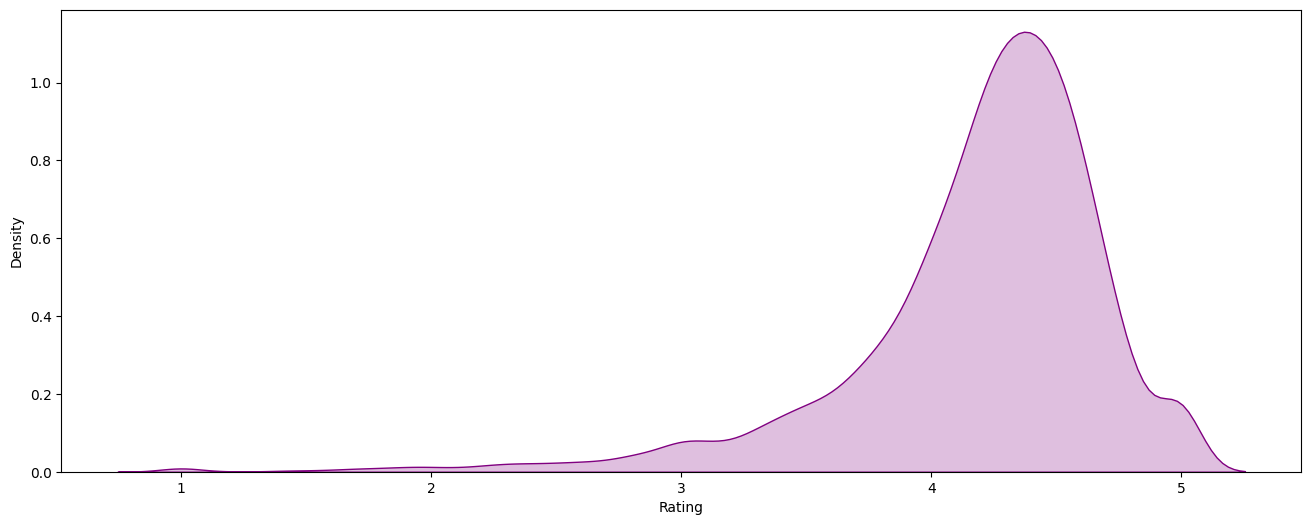

In [182]:
# plot the rating distribution 
plt.figure(figsize=(16,6))
sns.kdeplot(df["Rating"], color="purple", shade="True")

# Examples

<Axes: xlabel='Type', ylabel='Installs'>

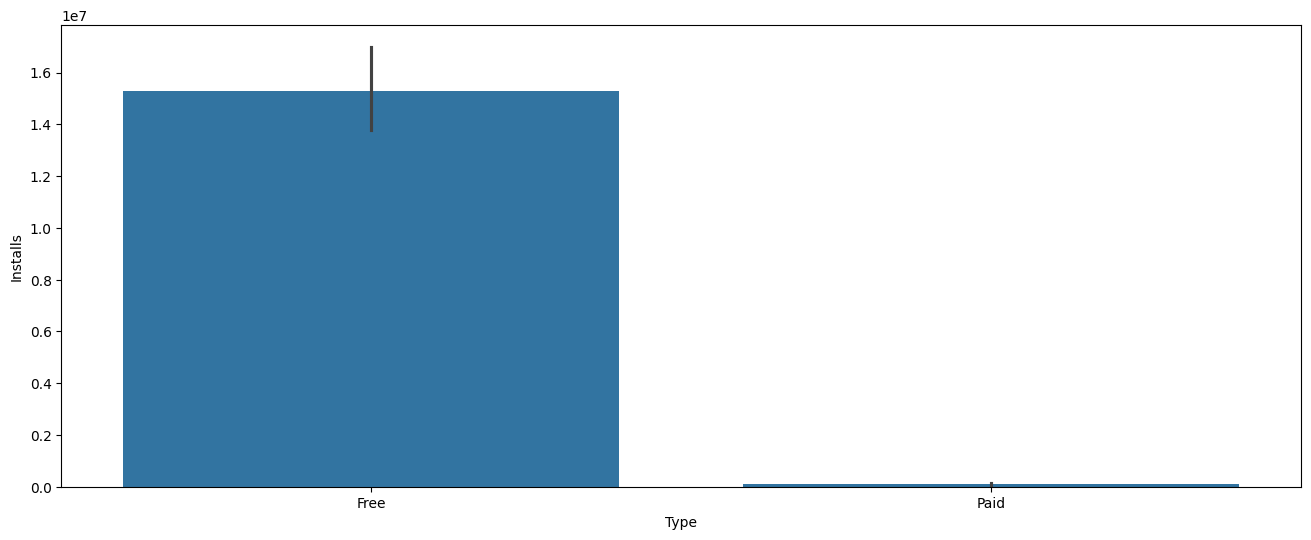

In [183]:
# plot number of installs for the free or paid apps make a bar plot
plt.figure(figsize=(16,6))
sns.barplot(x="Type", y="Installs", data=df)

<Axes: xlabel='Installs', ylabel='Price'>

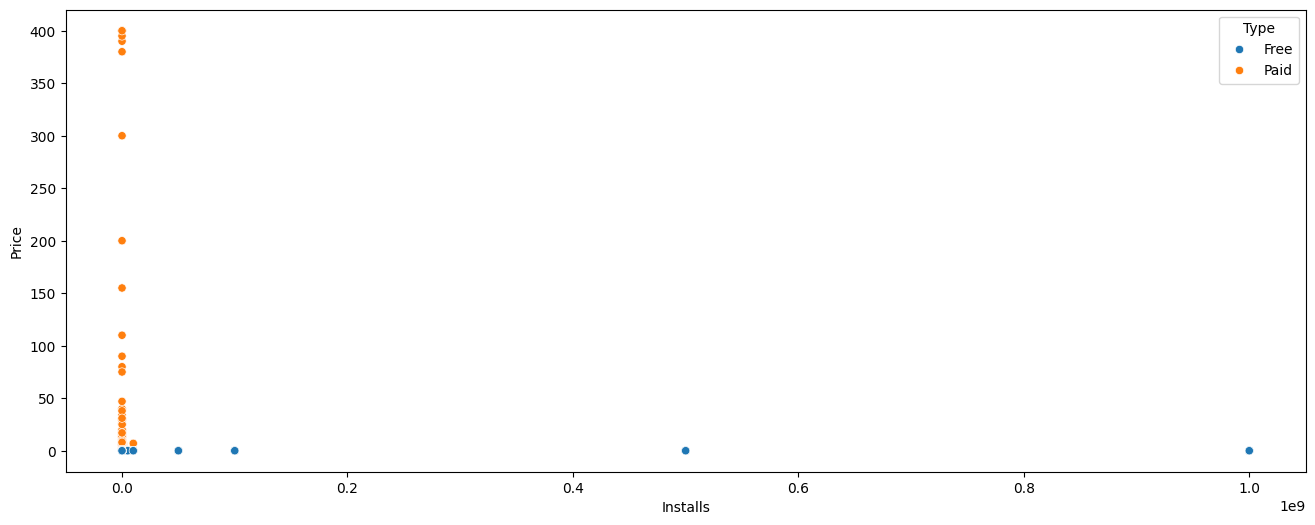

In [184]:
# show scatter plot as wel have where x-axis is installs and y-axis is price and hue is a type
plt.figure(figsize=(16,6))
sns.scatterplot(x="Installs", y="Price", hue="Type", data=df)

<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

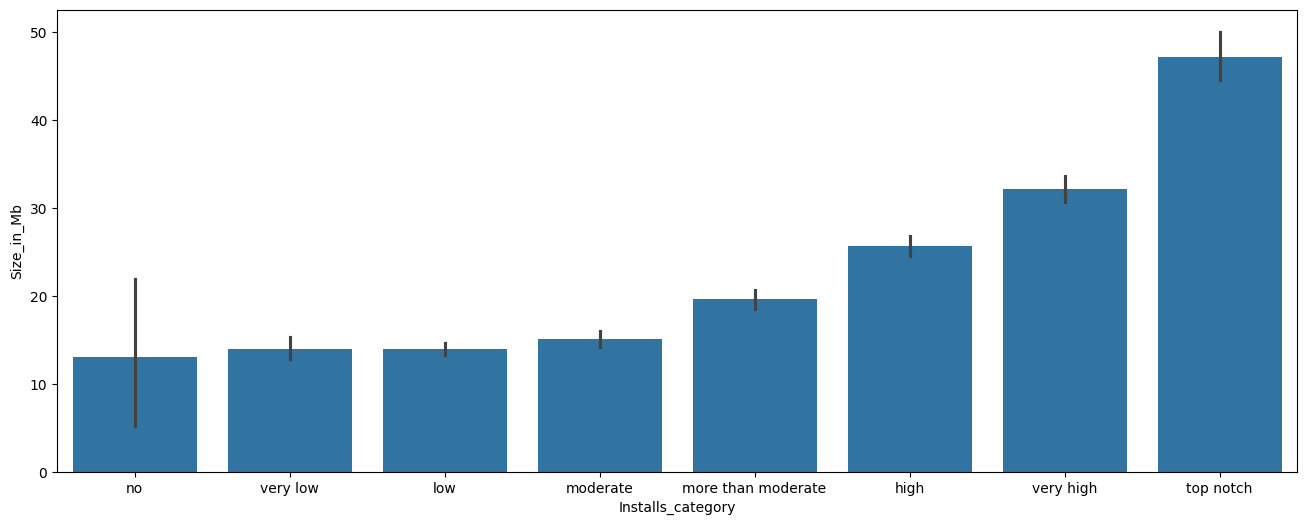

In [185]:
# check if there is any impact of size on Installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16,6))
sns.barplot(x="Installs_category", y="Size_in_Mb", data=df)

In [189]:
# # which content rating is most popular in installs
df.groupby("Content Rating")["Installs"].sum().sort_values(ascending=False).head(10)


Content Rating
Everyone           100228037851
Teen                30918280393
Everyone 10+        11191271795
Mature 17+           4290696878
Adults only 18+         2000000
Unrated                   50500
Name: Installs, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

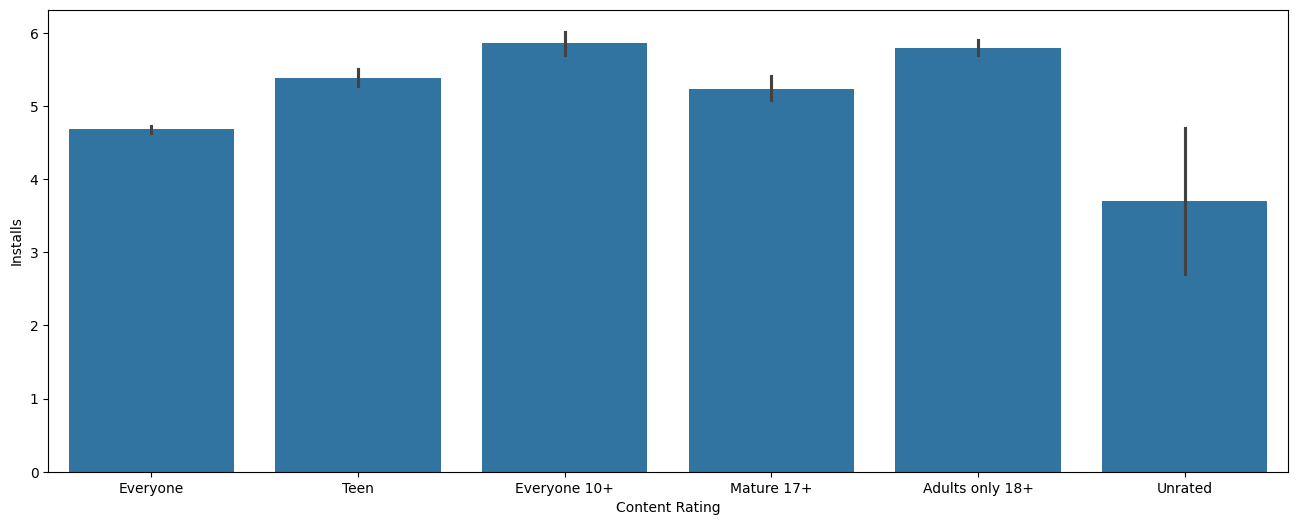

In [194]:
# plot the bar plot of content rating and installs
plt.figure(figsize=(16,6))
sns.barplot(x="Content Rating", y= np.log10(df["Installs"]), data=df)

In [200]:
# find how many categories are there in Everyone content rating
df[df["Content Rating"] == "Everyone"]["Category"].value_counts()
# or
df["Category"].loc[df["Content Rating"] == "Everyone"].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
SPORTS                  318
PERSONALIZATION         318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
WEATHER                  78
HOUSE_AND_HOME           78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

In [201]:
# plot top 5 rated paid app
df["App"].loc[df["Type"] == "Paid"].value_counts().head()

App
Human Anatomy Atlas 2018: Complete 3D Human Body    2
Fuzzy Numbers: Pre-K Number Foundation              2
Toca Life: City                                     2
Moco+ - Chat, Meet People                           2
HD Widgets                                          2
Name: count, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

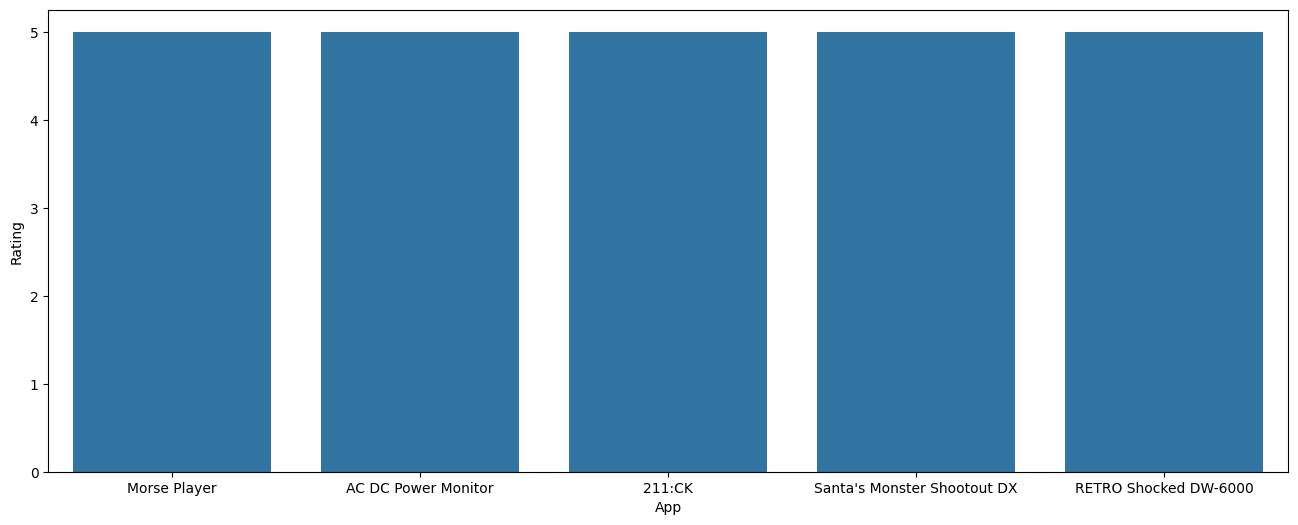

In [204]:
# barplot for top 5 rated paid apps
plt.figure(figsize=(16,6))
sns.barplot(x="App", y="Rating", data=df[df["Type"]=="Paid"].sort_values(by="Rating", ascending=False).head(5))

<Axes: xlabel='App', ylabel='Reviews'>

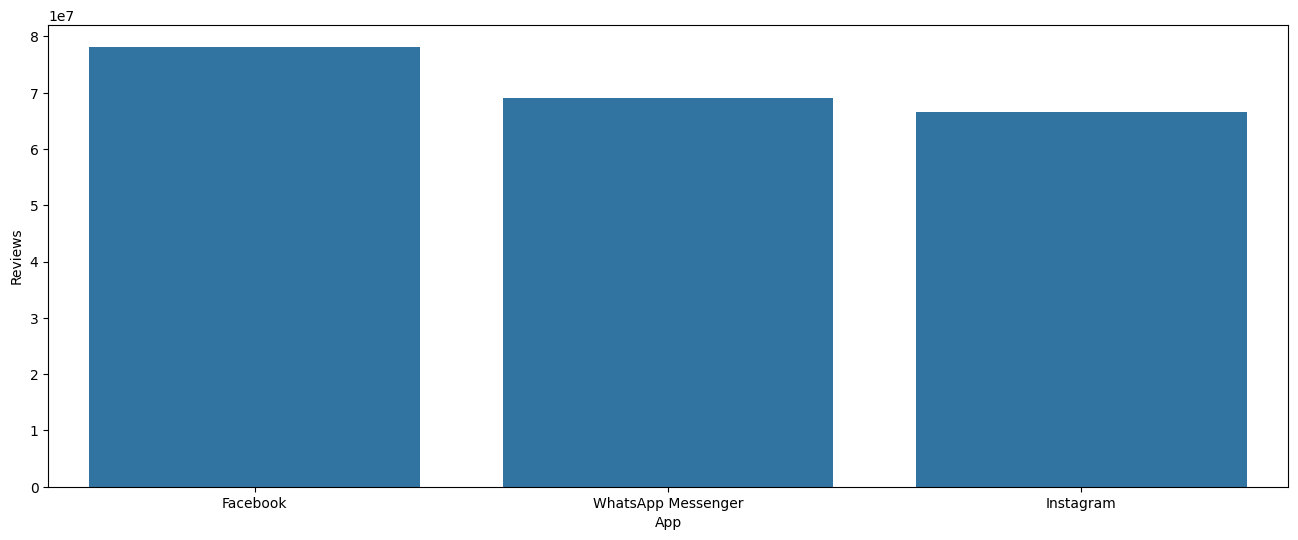

In [205]:
# bar plot top 5 free apps with highest number of reviews
plt.figure(figsize=(16,6))
sns.barplot(x="App", y="Reviews", data=df[df["Type"] == "Free"].sort_values(by="Reviews", ascending=False).head(5))
